In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TEXT EMOTION DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Loading the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TEXT-EMOTION/emotion_dataset_raw.csv")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

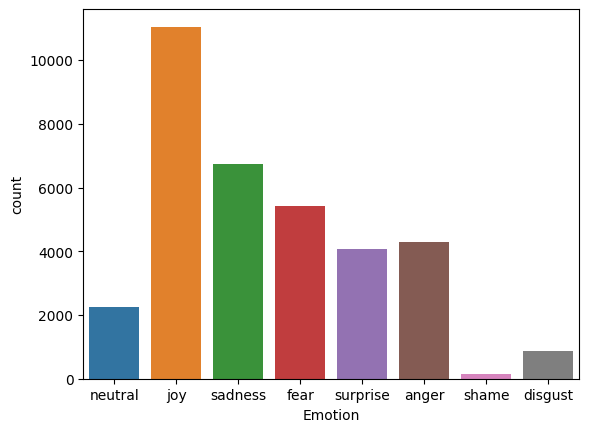

In [6]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [7]:
!pip3 install neattext
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.9 MB/s eta 0:00:00


In [8]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [10]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [11]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [12]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
x_numpy = x.values

# Reshape the input data to 2D array if it's 1D
x_reshaped = x_numpy.reshape(-1, 1)

# Instantiate RandomOverSampler to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x_reshaped, y)

# Convert the resampled data back to pandas Series if needed
x_resampled_series = pd.Series(X_resampled.squeeze())

<ipython-input-14-7f6a4212e55d>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


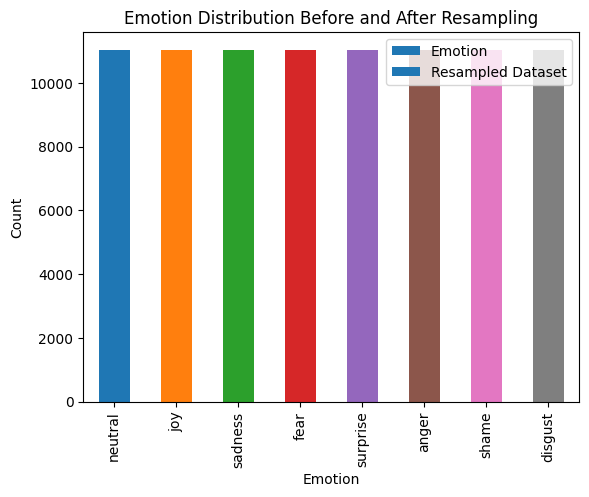

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Count emotions in the original dataset
original_emotion_counts = df['Emotion'].value_counts()

# Count emotions in the resampled dataset
resampled_emotion_counts = y_resampled.value_counts()

# Create a color map for the bar chart
cmap = cm.get_cmap('tab10')

# Create the bar chart
fig, ax = plt.subplots()
original_emotion_counts.plot(kind='bar', color=cmap(range(len(original_emotion_counts))), ax=ax)
resampled_emotion_counts.plot(kind='bar', color=cmap(range(len(resampled_emotion_counts))), label='Resampled Dataset', ax=ax)
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
ax.set_title('Emotion Distribution Before and After Resampling')
ax.legend()
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled_series, y_resampled, test_size=0.2, random_state=42)

In [16]:
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# !pip install scikit-learn==0.18 --force-reinstall
pipe_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

### Training the model

LINEAR REGRESSION MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


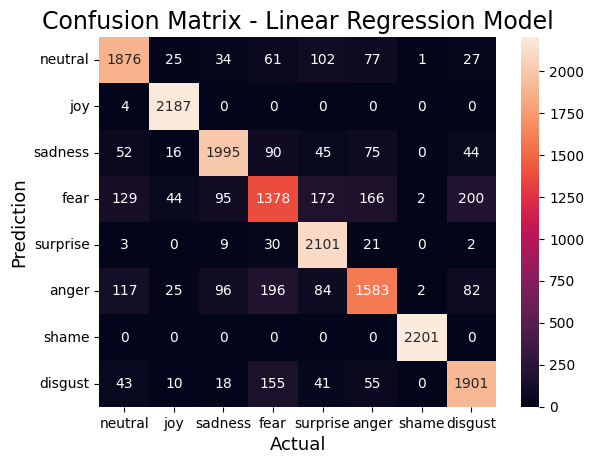

Accuracy   : 0.8613626075147125
Precision : 0.8613626075147125
Recall    : 0.8613626075147125
F1-score  : 0.8613626075147125


In [ ]:
pipe_lr.fit(X_train, y_train)
# accuracy = pipe_lr.score(X_test, y_test)
# print("Accuracy:", accuracy)

pred = pipe_lr.predict(X_test)
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"],
            yticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - Linear Regression Model',fontsize=17)
plt.show()

accuracy = accuracy_score(y_test, pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, pred, average='micro')
print("F1-score  :", F1_score)

RANDOM FOREST CLASSIFIER MODEL

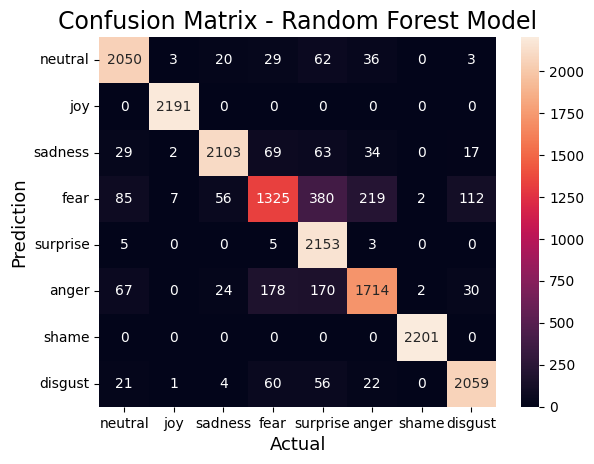

Accuracy: 0.893843368039837
Precision : 0.893843368039837
Recall    : 0.893843368039837
F1-score  : 0.893843368039837


In [ ]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=100,random_state=42))])
pipe_rf.fit(X_train, y_train)

predictions = pipe_rf.predict(X_test)
cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"],
            yticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - Random Forest Model',fontsize=17)
plt.show()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test, predictions, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, predictions, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions, average='micro')
print("F1-score  :", F1_score)

SVM MODEL

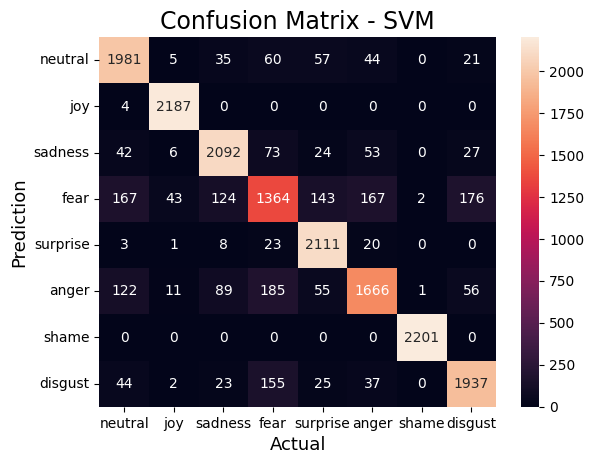

Accuracy: 0.8793005885015844
Precision : 0.8793005885015844
Recall    : 0.8793005885015844
F1-score  : 0.8793005885015844


In [17]:
pipe_svm = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('svm', SVC(probability=True, kernel='linear', random_state=42))  # SVM with linear kernel
])
pipe_svm.fit(X_train, y_train)
predictions = pipe_svm.predict(X_test)

cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"],
            yticklabels=["neutral","joy","sadness","fear","surprise","anger","shame", "disgust"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - SVM',fontsize=17)
plt.show()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test, predictions, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, predictions, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions, average='micro')
print("F1-score  :", F1_score)

ATTACHING EMOTIONS TO INPUTTED TEXT (ANNOTATION OF TEXT WITH EMOTIONS)

In [ ]:
# USING ONLY ONE MODEL
# emotion_attached_training_data = []

# for sentence in X_train:
#   sentence = nfx.remove_userhandles(sentence)
#   sentence = nfx.remove_stopwords(sentence)
#   emotion = pipe_lr.predict([sentence])[0]
#   emotion_attached_sentence = f"{sentence} <{emotion}>"
#   emotion_attached_training_data.append(emotion_attached_sentence)


# df1 = pd.DataFrame(emotion_attached_training_data)
# df1.to_csv('emotion_attached_training_data.csv', index=False)

#EMOTION ATTACHED TO INPUTTED TEXT IN "<>" FORMAT.

emotion_attached_training_data = []

for sentence in X_train:
    sentence = nfx.remove_userhandles(sentence)
    sentence = nfx.remove_stopwords(sentence)

    svm_prediction = pipe_svm.predict([sentence])[0]
    rf_prediction = pipe_rf.predict([sentence])[0]
    lr_prediction = pipe_lr.predict([sentence])[0]

    # Use majority vote to determine the final emotion
    predictions = [svm_prediction, rf_prediction, lr_prediction]
    majority_vote = max(set(predictions), key=list(set(predictions)).count)
    emotion_attached_sentence = f"{sentence} <{majority_vote}>"
    emotion_attached_training_data.append(emotion_attached_sentence)

df1 = pd.DataFrame(emotion_attached_training_data)
df1.to_csv('emotion_attached_training_data1.csv', index=False)

### Saving the model

LOGISTIC REGRESSION MODEL SAVING...

In [ ]:
import joblib
pipeline_file = open("text_emotion_balanced_dataset_emotion_attached_LR.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

RANDOM FOREST MODEL SAVING....

In [ ]:
import joblib
pipeline_file1 = open("text_emotion_balanced_dataset_emotion_attached_RF.pkl","wb")
joblib.dump(pipe_rf,pipeline_file1)
pipeline_file1.close()

SVM MODEL SAVING....

In [18]:
import joblib
pipeline_file2 = open("text_emotion_balanced_dataset_emotion_attached_SVM.pkl","wb")
joblib.dump(pipe_svm,pipeline_file2)
pipeline_file2.close()